In [ ]:
### For the Kaggle notebook only ###

# import sys 
# import os

# module_directory = "/kaggle/input/m2mo-dl/Projet"

# # Add the directory to sys.path
# if module_directory not in sys.path:
#     sys.path.append(module_directory)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


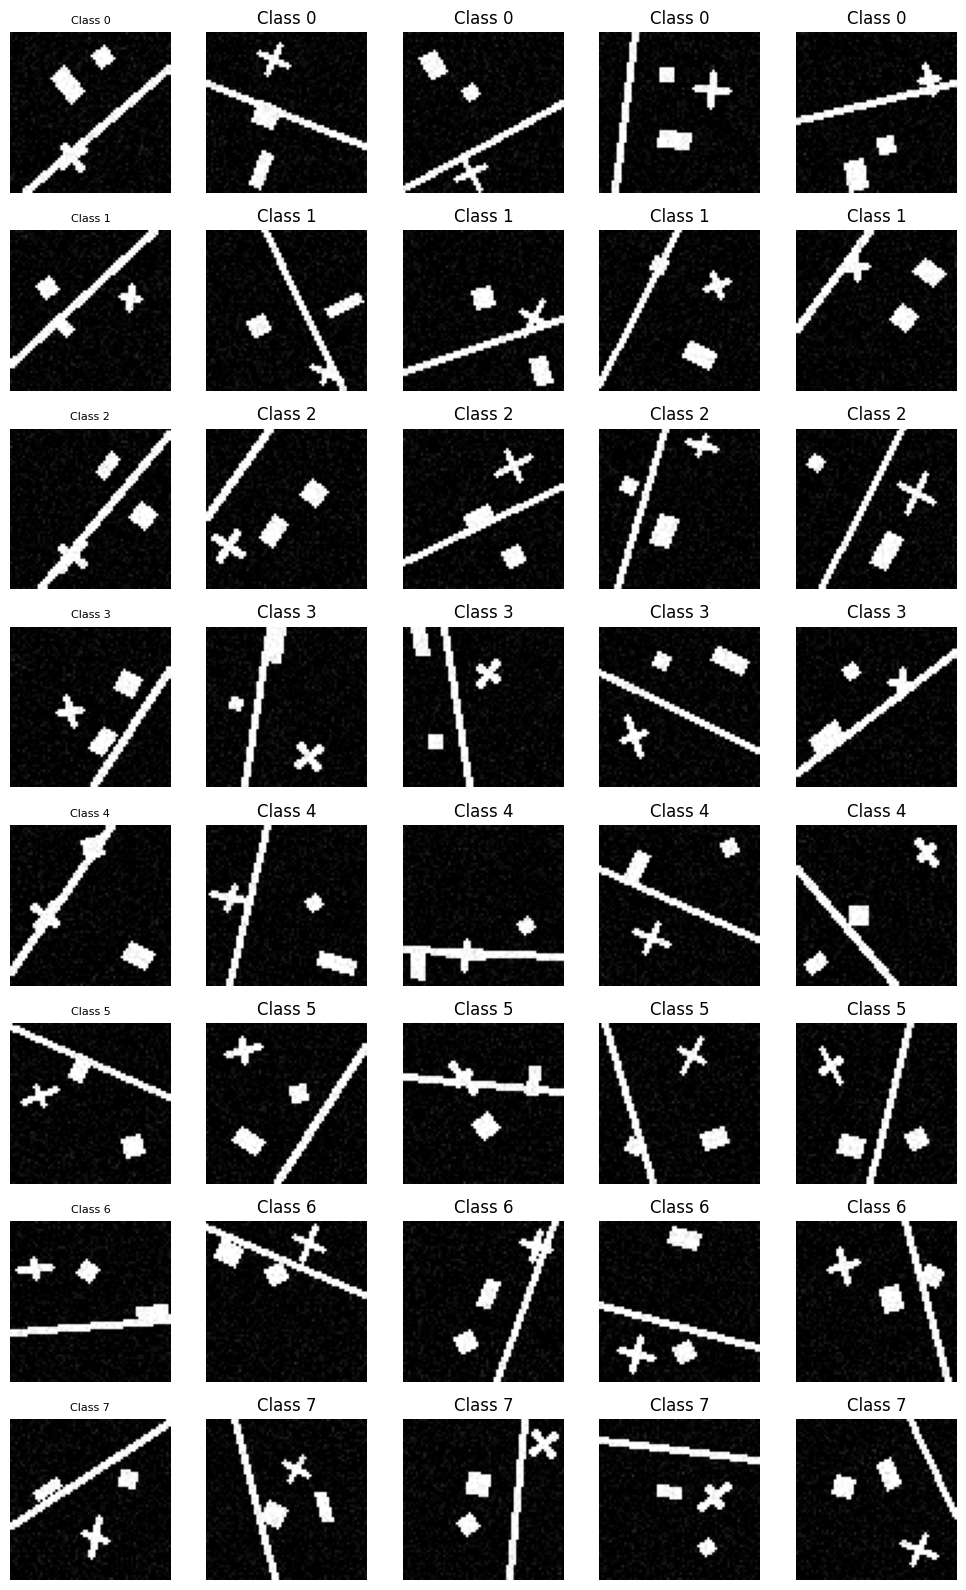

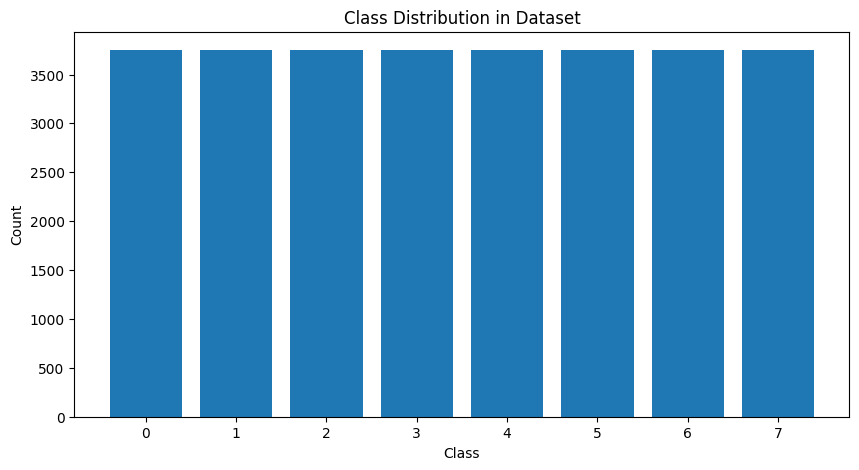

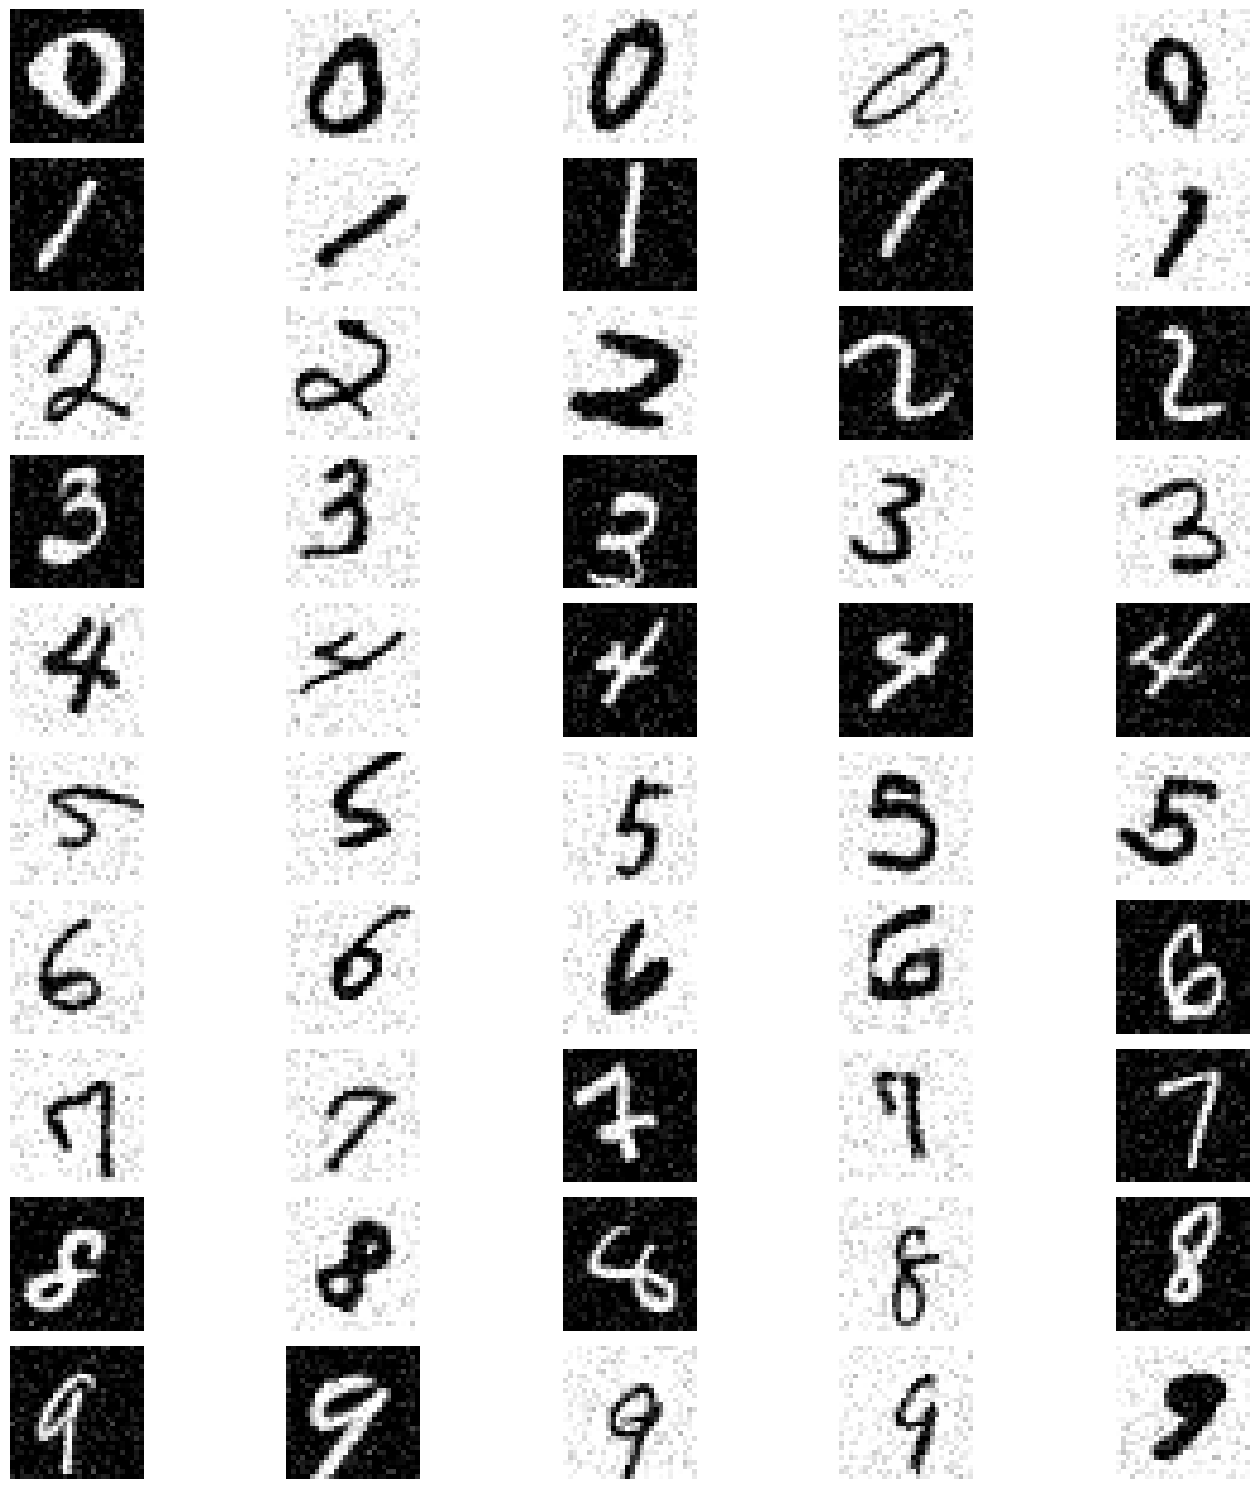

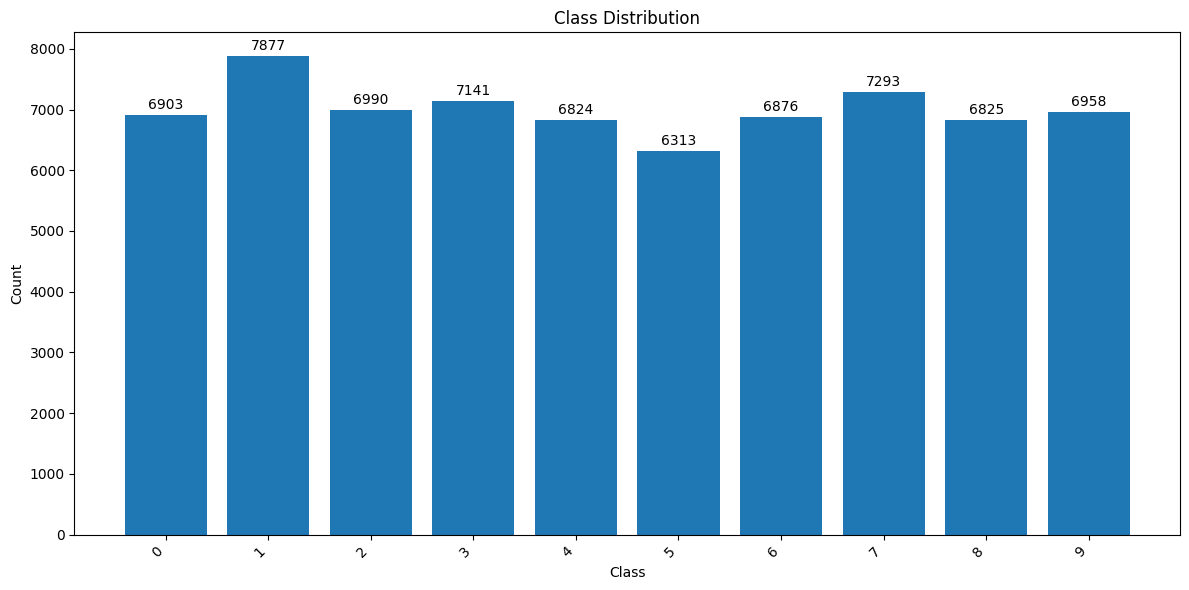

In [2]:
# In your Model_comparison.ipynb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import gc

# Import datasets
from data.relational_dataset import RelationalDataset
from data.mnist_dataset import MNISTDataset
from data.dataset_utils import create_tf_datasets, visualize_dataset_examples, plot_class_distribution

# Import models
from models.cnn_model import CNN
from models.vit_model import VisionTransformer 
from models.model_trainer import ModelTrainer

# Create datasets
relational_dataset = RelationalDataset(num_samples=30000, img_size=64)
mnist_dataset = MNISTDataset()

# Visualize datasets
visualize_dataset_examples(relational_dataset, "Relational Dataset Examples")
plot_class_distribution(relational_dataset)
visualize_dataset_examples(mnist_dataset, "MNIST Dataset Examples")
plot_class_distribution(mnist_dataset)

# Create TensorFlow datasets
rel_train_loader, rel_test_loader = create_tf_datasets(relational_dataset, batch_size=128)
mnist_train_loader, mnist_test_loader = create_tf_datasets(mnist_dataset, batch_size=128)

Training CNN on MNIST Dataset...
Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5971 - loss: 1.2230 - val_accuracy: 0.4477 - val_loss: 2.0215
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9193 - loss: 0.2555 - val_accuracy: 0.9468 - val_loss: 0.1705
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1615 - val_accuracy: 0.9601 - val_loss: 0.1315
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9617 - loss: 0.1186 - val_accuracy: 0.9641 - val_loss: 0.1208
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9696 - loss: 0.0921 - val_accuracy: 0.9646 - val_loss: 0.1181
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9741 - loss: 0.0812 - val_accuracy: 0.9644 - val_loss: 0.1243
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9772 - loss: 0.0689 - val_accuracy: 0.9689 - val_loss: 0.1086
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accurac

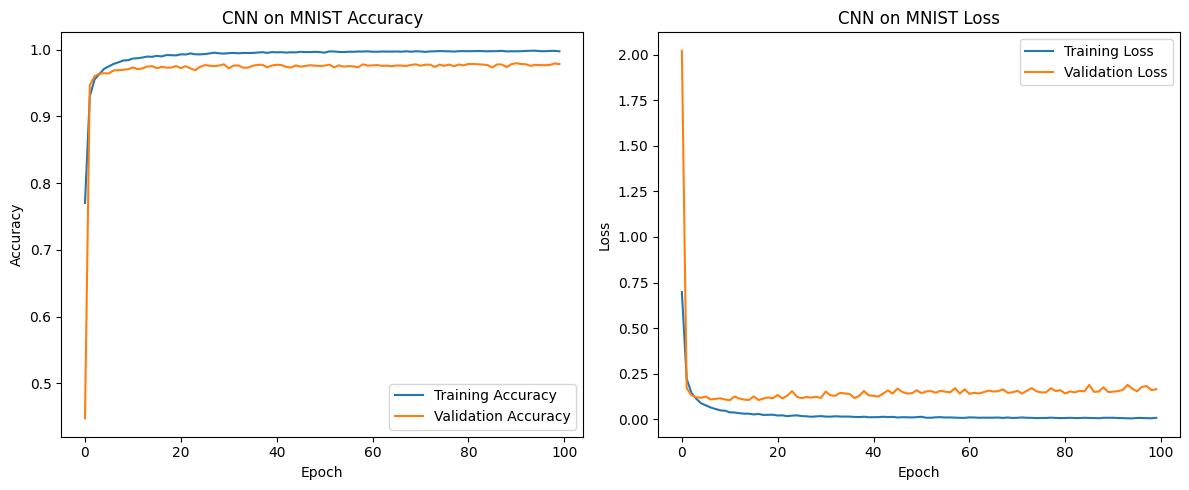

Training ViT on MNIST Dataset...
Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.1966 - loss: 2.2437 - val_accuracy: 0.6461 - val_loss: 1.0623
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6592 - loss: 1.0298 - val_accuracy: 0.8201 - val_loss: 0.5724
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7768 - loss: 0.6899 - val_accuracy: 0.8491 - val_loss: 0.4901
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8130 - loss: 0.5756 - val_accuracy: 0.8726 - val_loss: 0.4222
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8371 - loss: 0.5159 - val_accuracy: 0.8716 - val_loss: 0.4134
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8506 - loss: 0.4598 - val_accuracy: 0.8968 - val_loss: 0.3460
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8627 - loss: 0.4271 - val_accuracy: 0.8957 - val_loss: 0.3395
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accurac

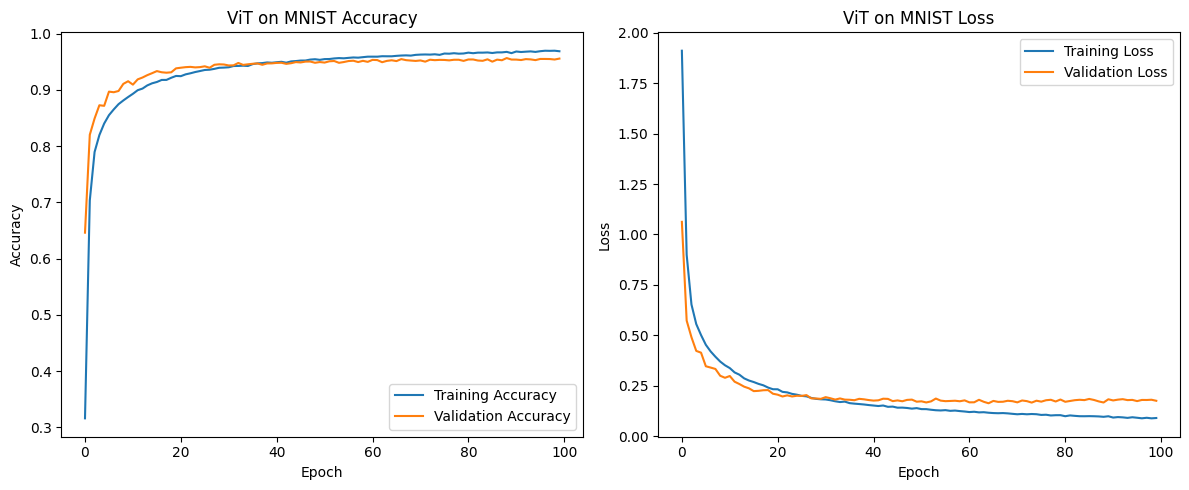

In [3]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# MNIST Models Training Section

# Initialize CNN model for MNIST
mnist_cnn_model = CNN(
    num_classes=10,  # MNIST has 10 classes (digits 0-9)
    in_channels=1,   # Grayscale images
    img_size=28,     # MNIST images are 28x28
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2
)


# Compile the model
mnist_cnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for MNIST dataset
mnist_cnn_trainer = ModelTrainer(mnist_cnn_model, mnist_train_loader, mnist_test_loader, model_name="CNN on MNIST")

# Train the model
print("Training CNN on MNIST Dataset...")
mnist_cnn_trainer.train(epochs=100, early_stopping=False)
mnist_cnn_trainer.evaluate()
mnist_cnn_trainer.plot_training_history()

# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Initialize Vision Transformer for MNIST
mnist_vit_model = VisionTransformer(
    patch_size=7,
    image_size=28,
    embedding_dim=64,
    num_heads=4,
    num_classes=10,
    in_channels=1,
    dropout_rate=0.2,
    num_blocks=2
)

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=5e-4, weight_decay=1e-4)

mnist_vit_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for MNIST dataset with ViT
mnist_vit_trainer = ModelTrainer(mnist_vit_model, mnist_train_loader, mnist_test_loader, model_name="ViT on MNIST")

# Train the model
print("Training ViT on MNIST Dataset...")
mnist_vit_trainer.train(epochs=100, early_stopping=False)
mnist_vit_trainer.evaluate()
mnist_vit_trainer.plot_training_history()

Final CNN Evaluation:
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.9783, Test Loss: 0.1646

Final ViT Evaluation:
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.9555, Test Loss: 0.1747


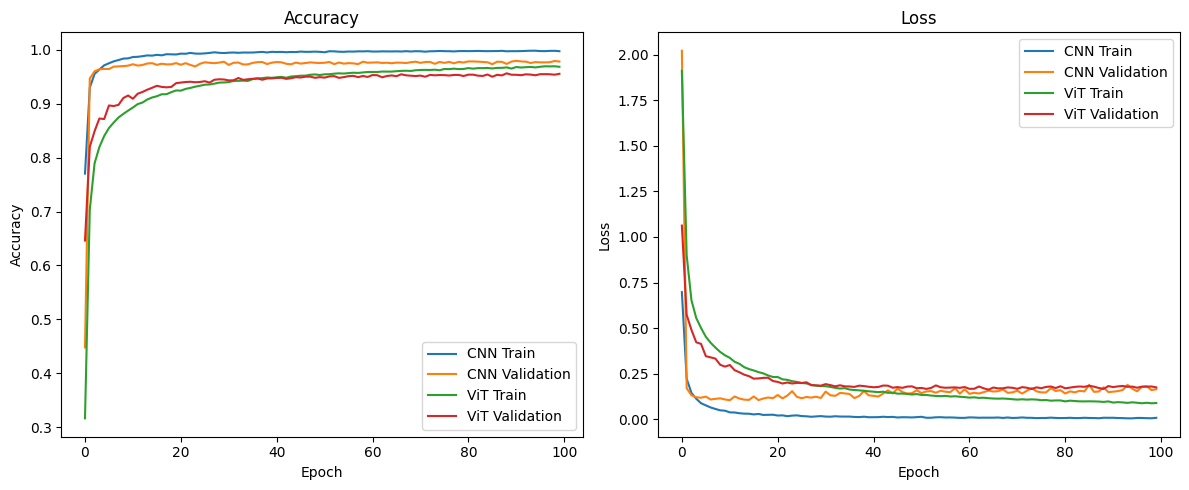

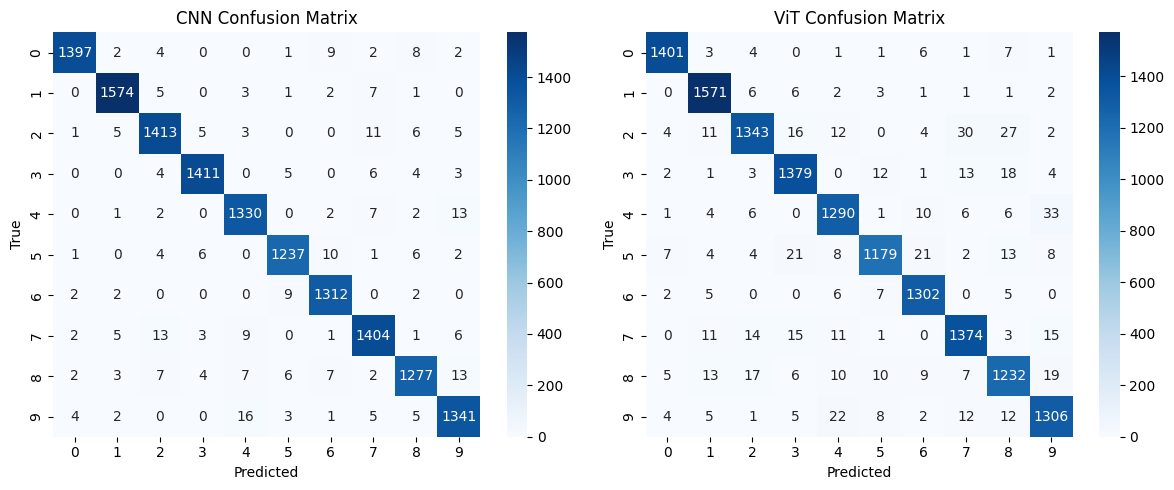


CNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1425
           1       0.99      0.99      0.99      1593
           2       0.97      0.98      0.97      1449
           3       0.99      0.98      0.99      1433
           4       0.97      0.98      0.98      1357
           5       0.98      0.98      0.98      1267
           6       0.98      0.99      0.98      1327
           7       0.97      0.97      0.97      1444
           8       0.97      0.96      0.97      1328
           9       0.97      0.97      0.97      1377

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000


ViT Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1425
           1       0.96      0.99      0.98      1593
           2       0.9

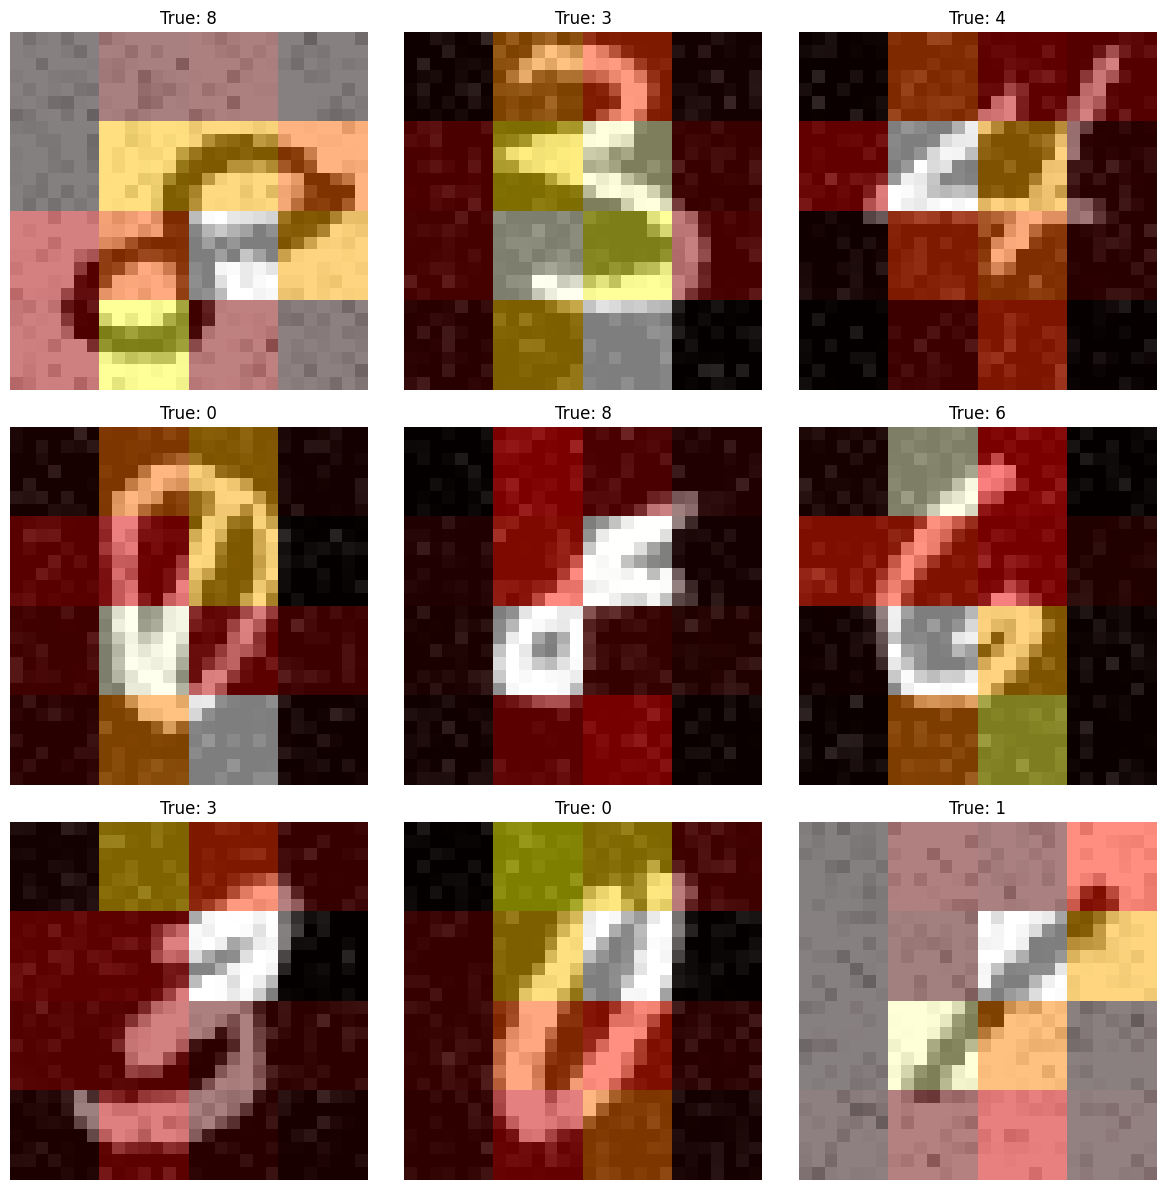

In [5]:
# 1. Extract training histories from your trainers
cnn_history = {
    'train_acc': mnist_cnn_trainer.history.history['accuracy'],
    'val_acc': mnist_cnn_trainer.history.history['val_accuracy'],
    'train_loss': mnist_cnn_trainer.history.history['loss'],
    'val_loss': mnist_cnn_trainer.history.history['val_loss']
}

vit_history = {
    'train_acc': mnist_vit_trainer.history.history['accuracy'],
    'val_acc': mnist_vit_trainer.history.history['val_accuracy'],
    'train_loss': mnist_vit_trainer.history.history['loss'],
    'val_loss': mnist_vit_trainer.history.history['val_loss']
}

# 2. Create proper evaluation function for predictions
def evaluate_model(model, dataset):
    """Evaluates a model and returns loss, accuracy, predictions and true labels"""
    # Get all batches from dataset
    all_images = []
    all_labels = []
    
    for images, labels in dataset:
        all_images.append(images)
        all_labels.append(labels)
    
    # Concatenate batches
    all_images = tf.concat(all_images, axis=0)
    all_labels = tf.concat(all_labels, axis=0)
    
    # Evaluate model
    loss, accuracy = model.evaluate(all_images, all_labels, verbose=0)
    
    # Get predictions
    predictions = model.predict(all_images)
    pred_classes = tf.argmax(predictions, axis=1).numpy()
    true_classes = all_labels.numpy()
    
    return loss, accuracy, pred_classes, true_classes

# 3. Run evaluations to get metrics and predictions
print("Final CNN Evaluation:")
cnn_test_loss, cnn_test_acc, cnn_preds, cnn_labels = evaluate_model(mnist_cnn_trainer.model, mnist_test_loader)
print(f"Test Accuracy: {cnn_test_acc:.4f}, Test Loss: {cnn_test_loss:.4f}")

print("\nFinal ViT Evaluation:")
vit_test_loss, vit_test_acc, vit_preds, vit_labels = evaluate_model(mnist_vit_trainer.model, mnist_test_loader)
print(f"Test Accuracy: {vit_test_acc:.4f}, Test Loss: {vit_test_loss:.4f}")

# 4. Plot training history comparison (your existing code should work with the new history dictionaries)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history['train_acc'], label='CNN Train')
plt.plot(cnn_history['val_acc'], label='CNN Validation')
plt.plot(vit_history['train_acc'], label='ViT Train')
plt.plot(vit_history['val_acc'], label='ViT Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history['train_loss'], label='CNN Train')
plt.plot(cnn_history['val_loss'], label='CNN Validation')
plt.plot(vit_history['train_loss'], label='ViT Train')
plt.plot(vit_history['val_loss'], label='ViT Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(cnn_labels, cnn_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
cm = confusion_matrix(vit_labels, vit_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('ViT Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# 6. Class-wise performance for MNIST
class_names = [str(i) for i in range(10)]  # 0-9 for MNIST

print("\nCNN Classification Report:")
print(classification_report(cnn_labels, cnn_preds, target_names=class_names))

print("\nViT Classification Report:")
print(classification_report(vit_labels, vit_preds, target_names=class_names))

# 7. Attention map visualization function (update to work with your specific model)
def get_attention_maps(model, image):
    # Add batch dimension if missing
    if len(tf.shape(image)) == 3:
        image = tf.expand_dims(image, axis=0)

    # Get attention weights from the model
    _, attention_maps = model(image, return_attention=True, training=False)

    # For a 28x28 image with patch size 4, we get 7x7=49 patches
    patch_size = 7
    img_size = 28
    grid_size = img_size // patch_size  # Should be 7 for MNIST

    # Shape of attention_maps is [batch, num_heads, seq_len, seq_len]
    # For ViT, seq_len = num_patches (49)
    # We need to average across heads and get attention from all patches
    # to the other patches
    
    # Average across attention heads
    mean_attention = tf.reduce_mean(attention_maps, axis=1)[0]  # Shape: [49, 49]
    
    # To visualize, we can either:
    # 1. Take attention from a specific patch to all others
    # 2. Sum/average attention received by each patch
    
    # Option 2: Average attention received by each patch
    patch_importance = tf.reduce_mean(mean_attention, axis=0)  # Shape: [49]
    
    # Reshape to grid
    attention_grid = tf.reshape(patch_importance, [grid_size, grid_size])
    
    return attention_grid.numpy()

# 8. Visualize attention maps for some examples
# Get a few test samples
test_samples = []
test_labels = []
for images, labels in mnist_test_loader.take(1):  # Get first batch
    test_samples = images.numpy()
    test_labels = labels.numpy()
    break

# Plot original images and attention maps for a few examples
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        idx = i*3 + j
        if idx < len(test_samples):
            image = test_samples[idx]
            label = test_labels[idx]
            
            # Get attention map
            attention_map = get_attention_maps(mnist_vit_trainer.model, image)
            
            # Plot attention overlay
            ax = axes[i, j]
            # Plot original image
            ax.imshow(np.squeeze(image), cmap='gray')
            
            # Resize attention map to match image size
            h, w = image.shape[0], image.shape[1]
            attention_size = int(np.sqrt(attention_map.size))
            patch_size = h // attention_size
            
            # Upsample attention map to match image size
            attention_upsampled = np.repeat(np.repeat(attention_map, patch_size, axis=0), patch_size, axis=1)
            
            # Plot attention heatmap with transparency
            ax.imshow(attention_upsampled, cmap='hot', alpha=0.5)
            ax.set_title(f"True: {label}")
            ax.axis('off')

plt.tight_layout()
plt.show()

Training CNN on Relational Dataset...
Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.1223 - loss: 2.3848 - val_accuracy: 0.1277 - val_loss: 9.4347
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1304 - loss: 2.0934 - val_accuracy: 0.1227 - val_loss: 4.4793
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1228 - loss: 2.0890 - val_accuracy: 0.1202 - val_loss: 2.0909
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1326 - loss: 2.0867 - val_accuracy: 0.1215 - val_loss: 2.0817
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1323 - loss: 2.0858 - val_accuracy: 0.1140 - val_loss: 2.0870
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1324 - loss: 2.0849 - val_accuracy: 0.1197 - val_loss: 2.0831
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1368 - loss: 2.0831 - val_accuracy: 0.1260 - val_loss: 2.0819
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/st

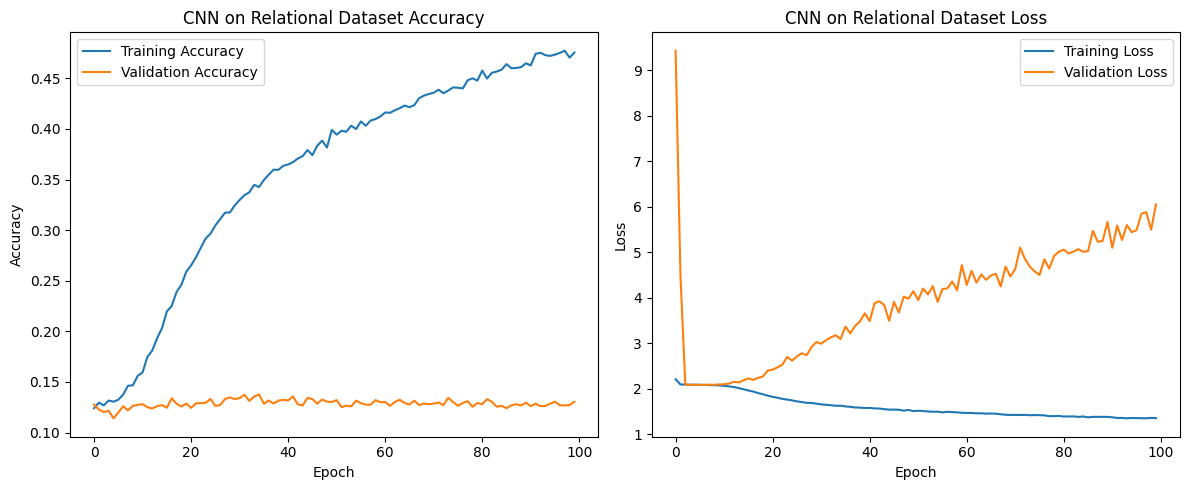

Training ViT on Relational Dataset...
Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.1211 - loss: 2.3210 - val_accuracy: 0.1287 - val_loss: 2.1271
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1255 - loss: 2.1045 - val_accuracy: 0.1250 - val_loss: 2.1006
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1349 - loss: 2.0919 - val_accuracy: 0.1267 - val_loss: 2.0958
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1352 - loss: 2.0865 - val_accuracy: 0.1167 - val_loss: 2.0916
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1478 - loss: 2.0783 - val_accuracy: 0.1193 - val_loss: 2.0857
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1516 - loss: 2.0721 - val_accuracy: 0.1267 - val_loss: 2.0927
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1679 - loss: 2.0622 - val_accuracy: 0.1232 - val_loss: 2.0931
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/st

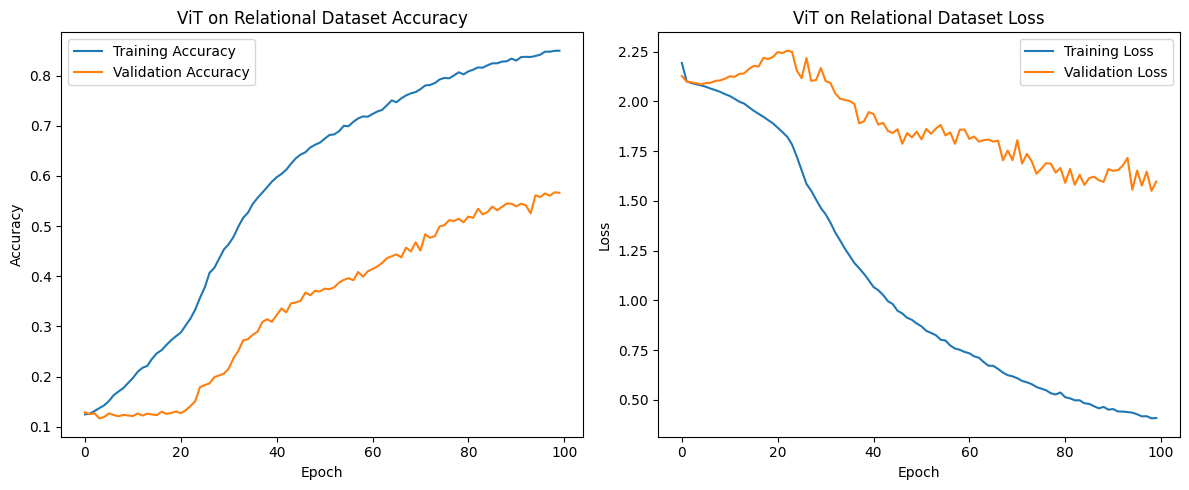

In [6]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Relational Dataset Models Training Section

# Initialize CNN model for Relational Dataset
rel_cnn_model = CNN(
    num_classes=10,  # Relational Dataset has 10 classes (digits 0-9)
    in_channels=1,   # Grayscale images
    img_size=64,     # Relational Dataset images are 64x64
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2
)

# Compile the model
rel_cnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for MNIST dataset
rel_cnn_trainer = ModelTrainer(rel_cnn_model, rel_train_loader, rel_test_loader, model_name="CNN on Relational Dataset")

# Train the model
print("Training CNN on Relational Dataset...")
rel_cnn_trainer.train(epochs=100, early_stopping=False)
rel_cnn_trainer.evaluate()
rel_cnn_trainer.plot_training_history()

# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Initialize Vision Transformer for Relational Dataset
rel_vit_model = VisionTransformer(
    patch_size=7,
    image_size=64,
    embedding_dim=64,
    num_heads=4,
    num_classes=10,
    in_channels=1,
    dropout_rate=0.2,
    num_blocks=2
)

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=5e-4, weight_decay=1e-4)

rel_vit_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset dataset with ViT
rel_vit_trainer = ModelTrainer(rel_vit_model, rel_train_loader, rel_test_loader, model_name="ViT on Relational Dataset")

# Train the model
print("Training ViT on Relational Dataset...")
rel_vit_trainer.train(epochs=100, early_stopping=False)
rel_vit_trainer.evaluate()
rel_vit_trainer.plot_training_history()

Final CNN Evaluation:
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy: 0.1303, Test Loss: 6.0552

Final ViT Evaluation:
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.5663, Test Loss: 1.5971


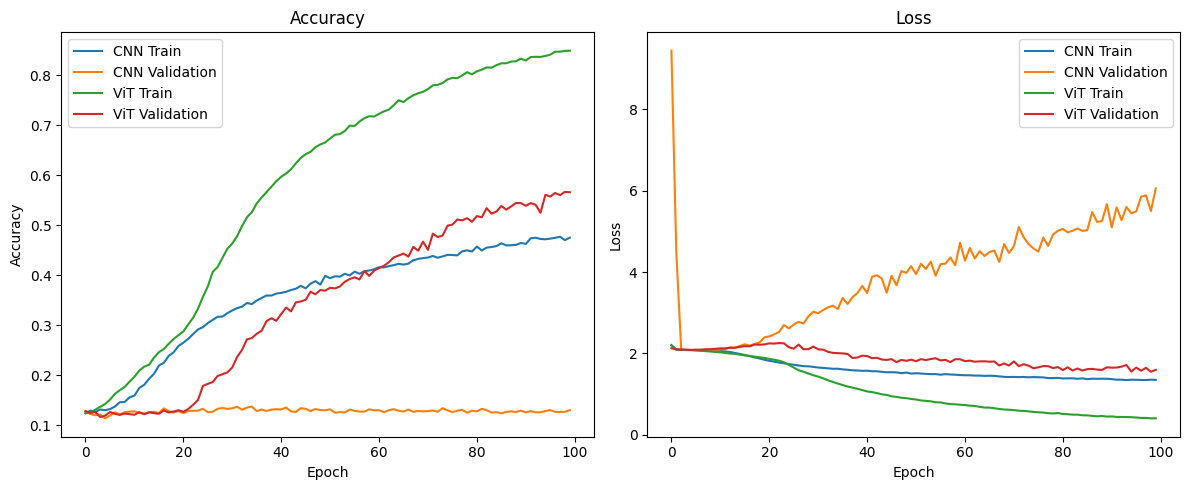

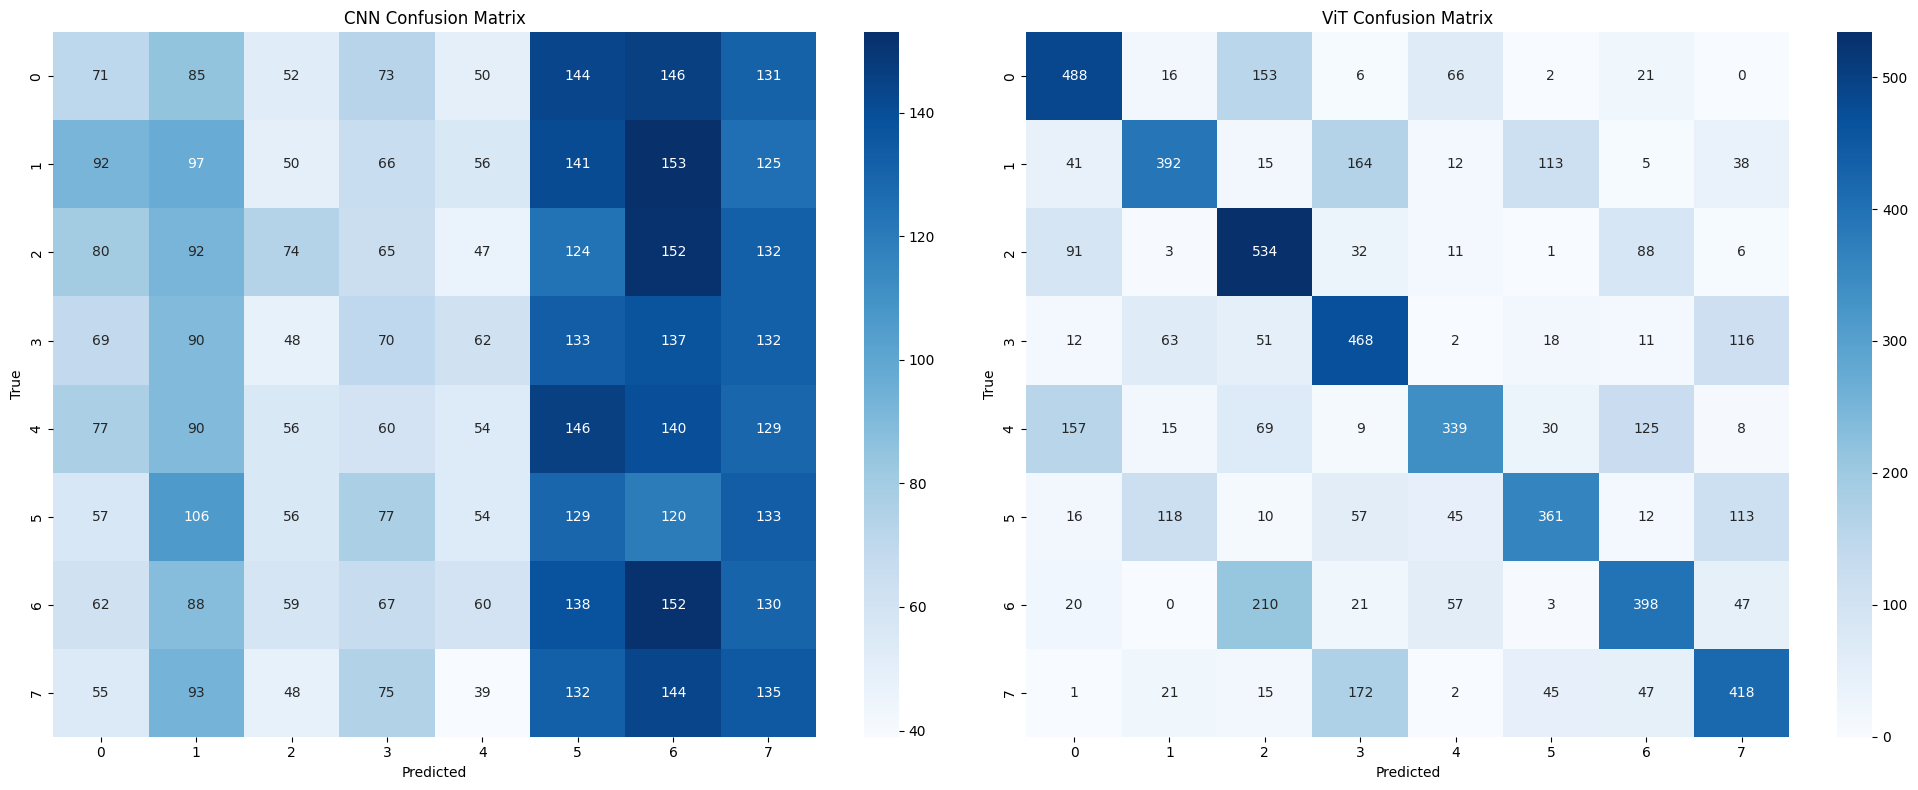


CNN Classification Report:
                                          precision    recall  f1-score   support

Line-Side, Cross-Parallel, Rect-Parallel       0.13      0.09      0.11       752
  Line-Side, Cross-Angled, Rect-Parallel       0.13      0.12      0.13       780
    Line-Side, Cross-Parallel, Rect-Perp       0.17      0.10      0.12       766
      Line-Side, Cross-Angled, Rect-Perp       0.13      0.09      0.11       741
Line-Diag, Cross-Parallel, Rect-Parallel       0.13      0.07      0.09       752
  Line-Diag, Cross-Angled, Rect-Parallel       0.12      0.18      0.14       732
    Line-Diag, Cross-Parallel, Rect-Perp       0.13      0.20      0.16       756
      Line-Diag, Cross-Angled, Rect-Perp       0.13      0.19      0.15       721

                                accuracy                           0.13      6000
                               macro avg       0.13      0.13      0.13      6000
                            weighted avg       0.13      0.13      0

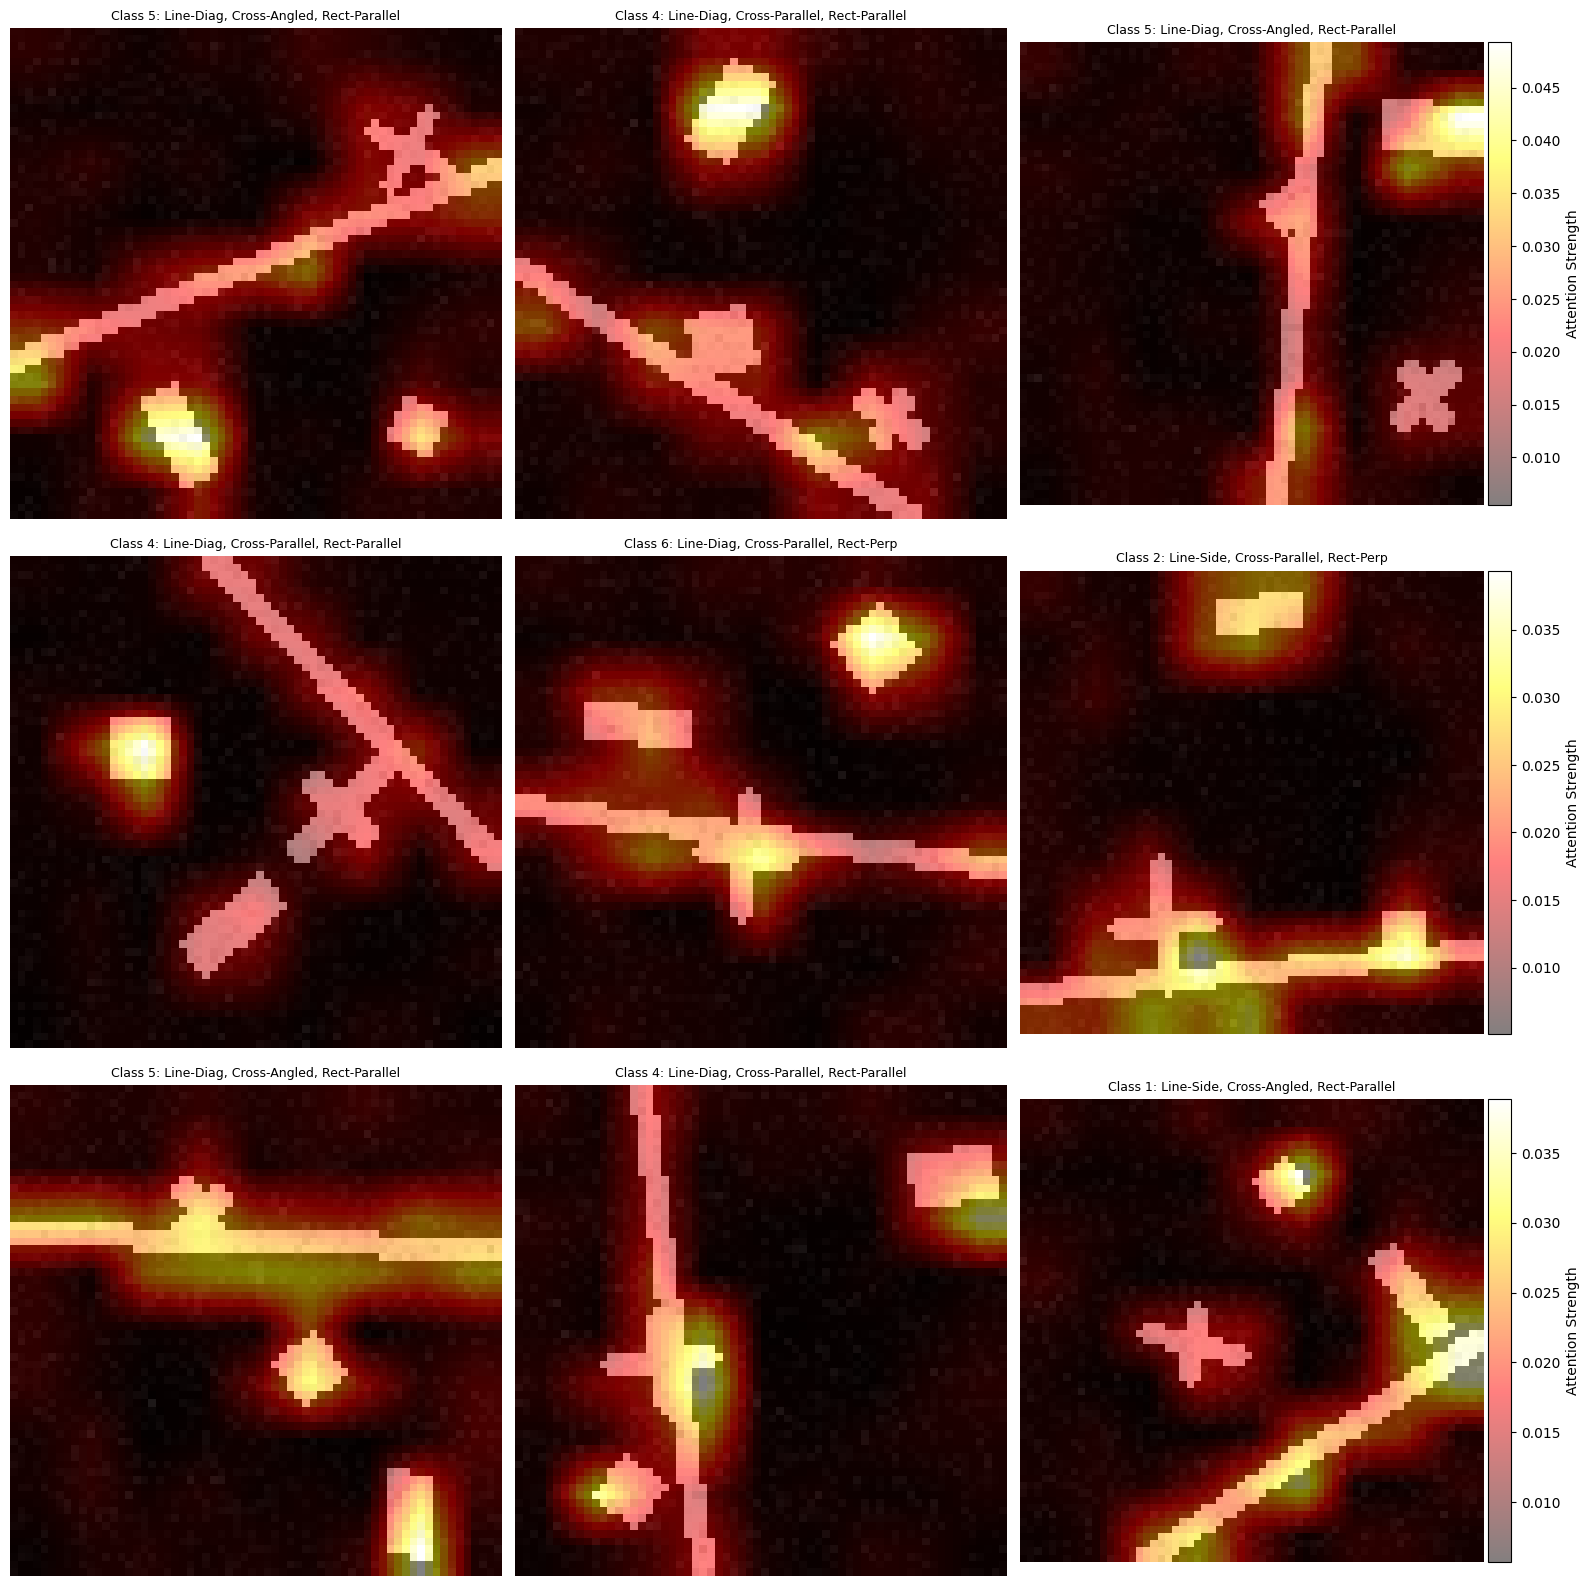

In [8]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import gc

# 1. Extract training histories
rel_cnn_history = {
    'train_acc': rel_cnn_trainer.history.history['accuracy'],
    'val_acc': rel_cnn_trainer.history.history['val_accuracy'],
    'train_loss': rel_cnn_trainer.history.history['loss'],
    'val_loss': rel_cnn_trainer.history.history['val_loss']
}

rel_vit_history = {
    'train_acc': rel_vit_trainer.history.history['accuracy'],
    'val_acc': rel_vit_trainer.history.history['val_accuracy'],
    'train_loss': rel_vit_trainer.history.history['loss'],
    'val_loss': rel_vit_trainer.history.history['val_loss']
}

# 2. Evaluation function
def evaluate_model(model, dataset):
    """Evaluates a model and returns loss, accuracy, predictions and true labels"""
    all_images = []
    all_labels = []
    
    for images, labels in dataset:
        all_images.append(images)
        all_labels.append(labels)
    
    all_images = tf.concat(all_images, axis=0)
    all_labels = tf.concat(all_labels, axis=0)
    
    loss, accuracy = model.evaluate(all_images, all_labels, verbose=0)
    
    predictions = model.predict(all_images)
    pred_classes = tf.argmax(predictions, axis=1).numpy()
    true_classes = all_labels.numpy()
    
    return loss, accuracy, pred_classes, true_classes

# 3. Run evaluations
print("Final CNN Evaluation:")
cnn_test_loss, cnn_test_acc, cnn_preds, cnn_labels = evaluate_model(rel_cnn_trainer.model, rel_test_loader)
print(f"Test Accuracy: {cnn_test_acc:.4f}, Test Loss: {cnn_test_loss:.4f}")

print("\nFinal ViT Evaluation:")
vit_test_loss, vit_test_acc, vit_preds, vit_labels = evaluate_model(rel_vit_trainer.model, rel_test_loader)
print(f"Test Accuracy: {vit_test_acc:.4f}, Test Loss: {vit_test_loss:.4f}")

# 4. Plot training history comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rel_cnn_history['train_acc'], label='CNN Train')
plt.plot(rel_cnn_history['val_acc'], label='CNN Validation')
plt.plot(rel_vit_history['train_acc'], label='ViT Train')
plt.plot(rel_vit_history['val_acc'], label='ViT Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rel_cnn_history['train_loss'], label='CNN Train')
plt.plot(rel_cnn_history['val_loss'], label='CNN Validation')
plt.plot(rel_vit_history['train_loss'], label='ViT Train')
plt.plot(rel_vit_history['val_loss'], label='ViT Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Confusion matrices
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
cm = confusion_matrix(cnn_labels, cnn_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
cm = confusion_matrix(vit_labels, vit_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('ViT Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# 6. Class-wise performance - shortened class names for readability
class_names = [
    "Line-Side, Cross-Parallel, Rect-Parallel",
    "Line-Side, Cross-Angled, Rect-Parallel",
    "Line-Side, Cross-Parallel, Rect-Perp",
    "Line-Side, Cross-Angled, Rect-Perp",
    "Line-Diag, Cross-Parallel, Rect-Parallel",
    "Line-Diag, Cross-Angled, Rect-Parallel",
    "Line-Diag, Cross-Parallel, Rect-Perp",
    "Line-Diag, Cross-Angled, Rect-Perp"
]

print("\nCNN Classification Report:")
print(classification_report(cnn_labels, cnn_preds, target_names=class_names))

print("\nViT Classification Report:")
print(classification_report(vit_labels, vit_preds, target_names=class_names))

# 7. Attention map visualization function for 64x64 images with patch size 7
def get_attention_maps(model, image):
    """Get attention maps for a model with uneven patch division"""
    # Add batch dimension if missing
    if len(tf.shape(image)) == 3:
        image = tf.expand_dims(image, axis=0)
    
    # Use the original image without padding
    _, attention_maps = model(image, return_attention=True, training=False)
    
    # Average across attention heads
    mean_attention = tf.reduce_mean(attention_maps, axis=1)[0]
    
    # Get sequence length from attention map shape
    seq_length = mean_attention.shape[0]
    
    # For uneven division, find the closest square
    grid_size = int(np.sqrt(seq_length))
    
    # Average attention received by each patch
    patch_importance = tf.reduce_mean(mean_attention, axis=0)
    
    # Reshape as closely as possible to a grid
    attention_grid = tf.reshape(patch_importance[:grid_size**2], [grid_size, grid_size])
    
    return attention_grid.numpy()

# 8. Improved attention overlay plot with colorbar
def plot_attention_overlay(image, attention_map, ax=None, add_colorbar=True):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    else:
        fig = ax.figure

    # For TensorFlow, image shape is [batch, H, W, C]
    # Remove batch dimension if present
    if len(image.shape) == 4:
        image = image[0]

    # Convert from tensor to numpy if needed
    image_np = image.numpy() if isinstance(image, tf.Tensor) else image

    # Plot the original image (with correct color handling)
    if image_np.shape[-1] == 3:  # RGB image
        ax.imshow(image_np)
    else:  # Grayscale
        ax.imshow(np.squeeze(image_np), cmap='gray')

    # For patch size 7 with 9×9 grid after cropping:
    patch_size = 7
    
    # Scale factor to match 64×64 from 9×9*7 (63×63)
    scale_h = image_np.shape[0] / (attention_map.shape[0] * patch_size)
    scale_w = image_np.shape[1] / (attention_map.shape[1] * patch_size)
    
    # Get image dimensions
    h, w = image_np.shape[0], image_np.shape[1]
    
    # Resize attention map to match image size directly
    attention_upsampled = tf.image.resize(
        attention_map[..., np.newaxis], 
        [h, w]
    ).numpy()[..., 0]

    # Plot attention heatmap with transparency
    im = ax.imshow(attention_upsampled, cmap='hot', alpha=0.5)
    ax.axis('off')
    
    # Add colorbar
    if add_colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = fig.colorbar(im, cax=cax)
        cbar.set_label('Attention Strength')
    
    return ax

# 9. Visualize attention maps for some examples
# Get a few test samples
test_samples = []
test_labels = []
for images, labels in rel_test_loader.take(1):  # Get first batch
    test_samples = images.numpy()
    test_labels = labels.numpy()
    break

# Create a mapping of numerical class label to readable name
label_to_name = {i: name for i, name in enumerate(class_names)}

# Plot original images and attention maps for a few examples
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
for i in range(3):
    for j in range(3):
        idx = i*3 + j
        if idx < len(test_samples):
            image = test_samples[idx]
            label = test_labels[idx]
            
            # Get attention map
            attention_map = get_attention_maps(rel_vit_trainer.model, image)
            
            # Plot attention overlay
            ax = axes[i, j]
            plot_attention_overlay(image, attention_map, ax, add_colorbar=(j==2))
            
            # Add a concise label with just the class number
            class_name = label_to_name[label] if isinstance(label, (int, np.integer)) else label_to_name[np.argmax(label)]
            ax.set_title(f"Class {label}: {class_name}", fontsize=9)

plt.tight_layout()
plt.show()